Diabetes prediction.

I removed duplicate data, replaced missing data, and encoded the features in the required format. I removed data leaks, found highly correlated pairs of features, and trained the data using the Stacking method using the LogisticRegression, RandomForestClassifier, KNeighborsClassifier, and XGBClassifier machine learning models.

Прогнозирование диабета.

Я убрала дублирующие данные, заменила пропуски, и  закодировала признаки в нужный формат, убрала лики в данных, нашла сильно коррелирующие пары признаков, обучила методом  Stacking использовав модели машинного обучения LogisticRegression, RandomForestClassifier,  KNeighborsClassifier, XGBClassifier .

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12


In [2]:
df = pd.read_excel('diabetes_ds.xlsx')
df.head(2)

,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,...,ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет (ЕСТЬ\НЕТ)
0,390.0,1.0,68.0,2.0,158.0,86.0,34.449607,5.33,163.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0,0,1.0
1,337.0,1.0,54.0,1.0,180.0,119.0,36.728395,5.01,130.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,35,1.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Columns: 108 entries, Номер to Сахарный диабет (ЕСТЬ\НЕТ)
dtypes: float64(101), object(7)
memory usage: 408.5+ KB


In [4]:
df.describe()

,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,...,ИБС. Стенокардия (ЕСТЬ\НЕТ),ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК",Сахарный диабет (ЕСТЬ\НЕТ)
count,482.000000,482.000000,481.000000,482.000000,481.000000,481.000000,482.000000,479.000000,482.000000,481.000000,...,483.000000,482.000000,483.000000,481.000000,482.000000,482.000000,482.000000,482.000000,482.000000,478.000000
mean,241.500000,1.506224,61.744283,1.174274,173.742204,92.345114,30.474568,4.958167,147.759544,0.002058,...,0.596273,0.742739,1.478261,2.713098,1.846473,1.844398,3.624481,2.307054,2.265560,0.533473
std,139.285678,0.500481,6.618086,0.379739,8.372827,19.118011,5.804603,0.564700,18.151691,0.045140,...,6.554634,0.442304,16.216285,0.814462,20.228766,1.317821,1.115969,0.551988,0.893507,0.499401
min,1.000000,1.000000,35.000000,1.000000,137.000000,48.000000,0.000000,2.740000,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,121.250000,1.000000,58.000000,1.000000,168.000000,80.000000,26.472107,4.580000,138.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,241.500000,2.000000,63.000000,1.000000,175.000000,90.000000,30.024919,4.950000,150.000000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,2.500000,4.000000,2.000000,2.000000,1.000000
75%,361.750000,2.000000,67.000000,1.000000,180.000000,103.000000,33.897211,5.290000,159.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,4.000000,3.000000,3.000000,1.000000
max,482.000000,2.000000,83.000000,2.000000,197.000000,184.000000,58.131488,7.220000,193.000000,0.990000,...,144.000000,2.000000,357.000000,3.000000,445.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [5]:
df.isnull().sum()

,0
Номер,2
Перенес/ не перенес КВИ,2
Возраст,3
Пол,2
"Рост, см",3
...,...
"АГ, риск",2
"ХСН, стадии",2
"ХСН, ФК",2
"ХСН по фракции выброса, %",2


In [6]:
df.dtypes.head(20)

,0
Номер,float64
Перенес/ не перенес КВИ,float64
Возраст,float64
Пол,float64
"Рост, см",float64
"Вес, кг",float64
ИМТ 2 (ФОРМУЛА EXCEL),float64
Эритроциты,float64
Гемоглобин,float64
Цветовой показатель,float64


In [7]:
df['Сахарный диабет (ЕСТЬ\НЕТ)'].describe()

,Сахарный диабет (ЕСТЬ\НЕТ)
count,478.000000
mean,0.533473
std,0.499401
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df['Сахарный диабет (ЕСТЬ\НЕТ)'].value_counts().sort_index().head(5)

,count
Сахарный диабет (ЕСТЬ\НЕТ),
0.0,223
1.0,255


In [14]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Number of Numerical features: ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Number of Categorical features: ', len(categorical_feats))

Number of Numerical features:  101
Number of Categorical features:  7


In [15]:
print(df[numerical_feats].columns)
print('*'*100)
print(df[categorical_feats].columns)

Index(['Номер', 'Перенес/ не перенес КВИ', 'Возраст', 'Пол', 'Рост, см',
       'Вес, кг', 'ИМТ 2 (ФОРМУЛА EXCEL)', 'Эритроциты', 'Гемоглобин',
       'Цветовой показатель',
       ...
       'ИБС. Стенокардия (ЕСТЬ\НЕТ)', 'ИБС. ПИКС', 'ИБС. ПИКС (ЕСТЬ\НЕТ)',
       'АГ, стадия', 'АГ (ЕСТЬ\НЕТ)', 'АГ, степень', 'АГ, риск', 'ХСН, стадии',
       'ХСН, ФК', 'Сахарный диабет (ЕСТЬ\НЕТ)'],
      dtype='object', length=101)
****************************************************************************************************
Index(['BPB голеней',
       'Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса', 'Блокада НП Гисса (комментарий)', 'AV- блокада',
       'ХБП (исходн)', 'ХСН по фракции выброса, %'],
      dtype='object')


In [16]:
df.rename(columns={'Сахарный диабет (ЕСТЬ\НЕТ)': 'diabetes'}, inplace=True)

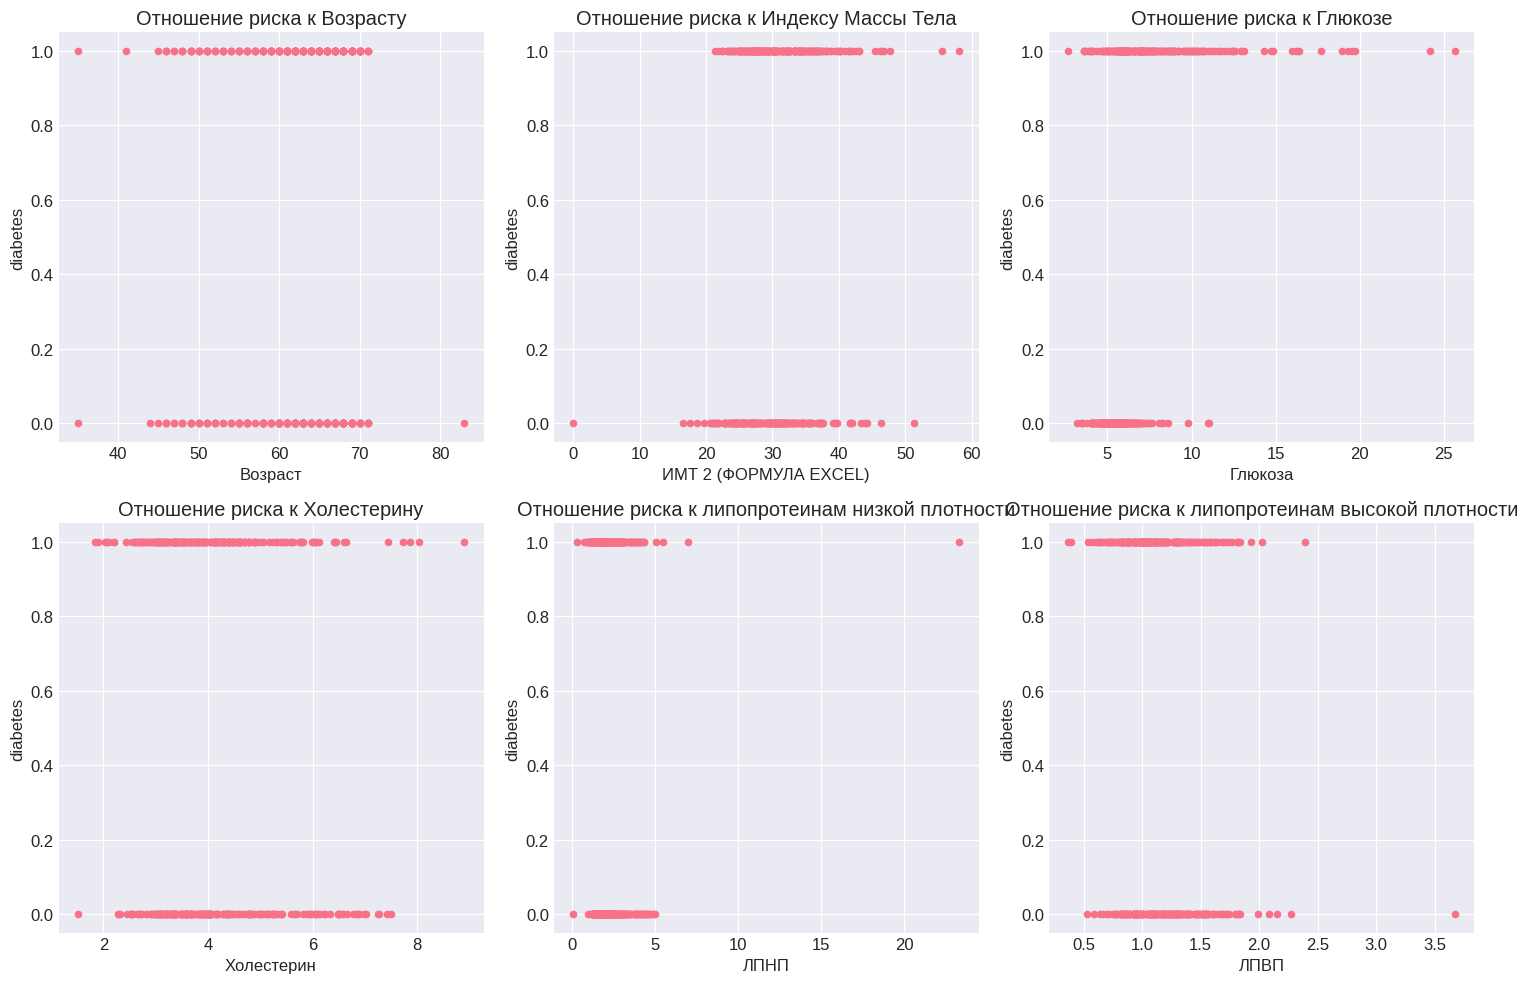

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['Возраст', 'ИМТ 2 (ФОРМУЛА EXCEL)', 'Глюкоза', 'Холестерин', 'ЛПНП', 'ЛПВП']
titles = [
    'Отношение риска к Возрасту',
    'Отношение риска к Индексу Массы Тела',
    'Отношение риска к Глюкозе',
    'Отношение риска к Холестерину',
    'Отношение риска к липопротеинам низкой плотности',
    'Отношение риска к липопротеинам высокой плотности'
]

for i, (feature, title) in enumerate(zip(features, titles)):
    row, col = i // 3, i % 3
    df.plot.scatter(x=feature, y='diabetes', ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

In [39]:
y = df.diabetes
df.drop(['diabetes'], axis=1, inplace=True)

In [41]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['float64', 'int64']]
X = df[numeric_cols].copy()

# Удаляем ID-признаки перед обучением
if 'Номер' in X.columns:
    X = X.drop('Номер', axis=1)

In [42]:
# Анализ корреляции между признаками
corr_matrix = X.corr().abs()

# Ищем пары признаков с очень высокой корреляцией (>0.95)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.95:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Найдены сильно коррелирующие пары признаков:")
    for col1, col2, corr in high_corr_pairs:
        print(f"{col1} — {col2}: {corr:.3f}")
else:
    print("Сильно коррелирующих пар не найдено")


Найдены сильно коррелирующие пары признаков:
Перенес/ не перенес КВИ — Прокальцитонин: 1.000
Возраст — Прокальцитонин: 1.000
Пол — Прокальцитонин: 1.000
Рост, см — Прокальцитонин: 1.000
Вес, кг — Прокальцитонин: 1.000
ИМТ 2 (ФОРМУЛА EXCEL) — Прокальцитонин: 1.000
Эритроциты — Прокальцитонин: 1.000
Гемоглобин — Прокальцитонин: 1.000
Лейкоциты — Прокальцитонин: 1.000
Лимфоциты%  — Прокальцитонин: 1.000
ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ) — Прокальцитонин: 1.000
Тромбоциты — Прокальцитонин: 1.000
СОЭ — Прокальцитонин: 1.000
Холестерин — Прокальцитонин: 1.000
Глюкоза — Прокальцитонин: 1.000
Ферритин — Лактат: 1.000
Прокальцитонин — АЛТ: 1.000
Прокальцитонин — АСТ: 1.000
Прокальцитонин — Мочевина: 1.000
Прокальцитонин — Креатинин, мкмоль/л: 1.000
Прокальцитонин — СКФ CKD-EPI (расчет по общей формуле): 1.000
Прокальцитонин — Натрий: 1.000
Прокальцитонин — Калий: 1.000
Прокальцитонин — АЧТВ: 1.000
Прокальцитонин — МНО: 1.000
Прокальцитонин — Фибриноген: 1.000
Прокальцитонин — D-димер: 1.000
Пр

Главный лик — Прокальцитонин (является расчетным индексом, который уже содержит информацию о диагнозе)

Избыточность — модель получает одну и ту же информацию 30+ раз

Мультиколлинеарность — линейные модели становятся нестабильными

Риск переобучения — модель может выучить шум

Идеальная корреляция (1.000) — это практически копии признаков

In [43]:
# Создаем список признаков для удаления (оставляем только "ОЖИРЕНИЕ (ЕСТЬ\НЕТ)")
leak_features = [
    'Прокальцитонин',
    'Перенес/ не перенес КВИ',  # УЖЕ перенес — это пост-фактум
    'Фуросемид', 'Амлодипин',  # Препараты назначают ПОСЛЕ диагноза
    'Гиполипидемические препараты (статины)',  # Назначают при диабете/сердечных
    'Антикоагулянты, препарат', 'Дапаглифлозин',  # Лекарства от диабета
    'СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ',  # Производная, но ожирение — фактор риска
    'ОЖИРЕНИЕ (ЕСТЬ\НЕТ)',  # Диагноз ожирения
    'BPB голеней (ЕСТЬ/НЕТ)',  # Симптом/осложнение
    'Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ',  # Осложнение
    'Мерцательная аритмия', 'Мерцательная аритмия (ЕСТЬ\НЕТ)',  # Диагноз
    'ИБС. Стенокардия', 'ИБС. Стенокардия (ЕСТЬ\НЕТ)',  # Диагноз
    'ХСН, стадии'  # Диагноз с указанием стадии
]

# Удаляем избыточные признаки
X = X.drop(columns=leak_features)
print(f"Удалено {len(leak_features)} избыточных признаков")
print(f"Оставшиеся признаки: {X.columns.tolist()}")

Удалено 16 избыточных признаков
Оставшиеся признаки: ['Возраст', 'Пол', 'Рост, см', 'Вес, кг', 'ИМТ 2 (ФОРМУЛА EXCEL)', 'Эритроциты', 'Гемоглобин', 'Цветовой показатель', 'Лейкоциты', 'Лимфоциты% ', 'ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)', 'Тромбоциты', 'СОЭ', 'Холестерин', 'ЛПНП', 'ЛПВП', 'Индекс атерогенности 2 (формула excel)', 'Глюкоза', 'Гликированный гемоглобин', 'СРБ', 'Ферритин', 'Альбумин', 'Лактат', 'ЛДГ', 'АЛТ', 'АСТ', 'Общий билирубин', 'Натрийуретический пептид', 'Мочевина', 'Креатинин, мкмоль/л', 'СКФ CKD-EPI (расчет по общей формуле)', 'Натрий', 'Калий', 'АЧТВ', 'МНО', 'Фибриноген', 'D-димер', 'Фавипиравир', 'Молнупиравир', 'Гидрохлортиазид', 'Торасемид', 'Спиронолактон', 'Валсартан', 'Телмисартан', 'Лозартан', 'Кандесартан', 'Изосорбида динитрат', 'Периндоприл', 'Рамиприл', 'Эналаприл', 'Лизиноприл', 'Бисопролол', 'Карведилол', 'Атенолол', 'Верапамил', 'Дилтиазем', 'Леркамен', 'Дигоксин', 'Ивабрадин', 'Антикоагулянты, препарат 2', 'Антиагреганты, препарат 1', 'Антиагрегант

Перенес/ не перенес КВИ — спрашивает о событии В ПРОШЛОМ. Если это событие произошло до или после постановки диагноза диабета — неизвестно.

Лекарства (Фуросемид, Амлодипин, статины, антикоагулянты, Дапаглифлозин) — их назначают ПОСЛЕ постановки диагноза. Если модель увидит, что пациенту прописан Дапаглифлозин (лекарство от диабета), она сразу поймет, что у него диабет.

Диагнозы (ОЖИРЕНИЕ, Мерцательная аритмия, ИБС, ХСН) — это сопутствующие заболевания. Они могут быть факторами риска, но часто являются следствием диабета, а не причиной.

In [44]:
# Убедимся, что все NaN заменены на среднее по палате
X = X.fillna(X.mean()) if isinstance(X, (pd.DataFrame, pd.Series)) else np.where(np.isnan(X), np.nanmean(X), X)
y = y.fillna(y.mean()) if isinstance(y, (pd.DataFrame, pd.Series)) else np.where(np.isnan(y), np.nanmean(y), y)

In [45]:
print(f"Размер X до обработки: {df[numeric_cols].shape}")
print(f"Размер y до обработки: {y.shape}")

Размер X до обработки: (484, 100)
Размер y до обработки: (484,)


In [46]:
print(f"Тип y: {y.dtype}")
print(f"Уникальные значения: {np.unique(y)}")

# Если это float с целыми значениями
if y.dtype in ['float64', 'float32'] and np.all(y == y.astype(int)):
    y = y.astype(int)

# Если нужно округлить
elif y.dtype in ['float64', 'float32']:
    y = np.round(y).astype(int)

Тип y: float64
Уникальные значения: [0.        0.5334728 1.       ]


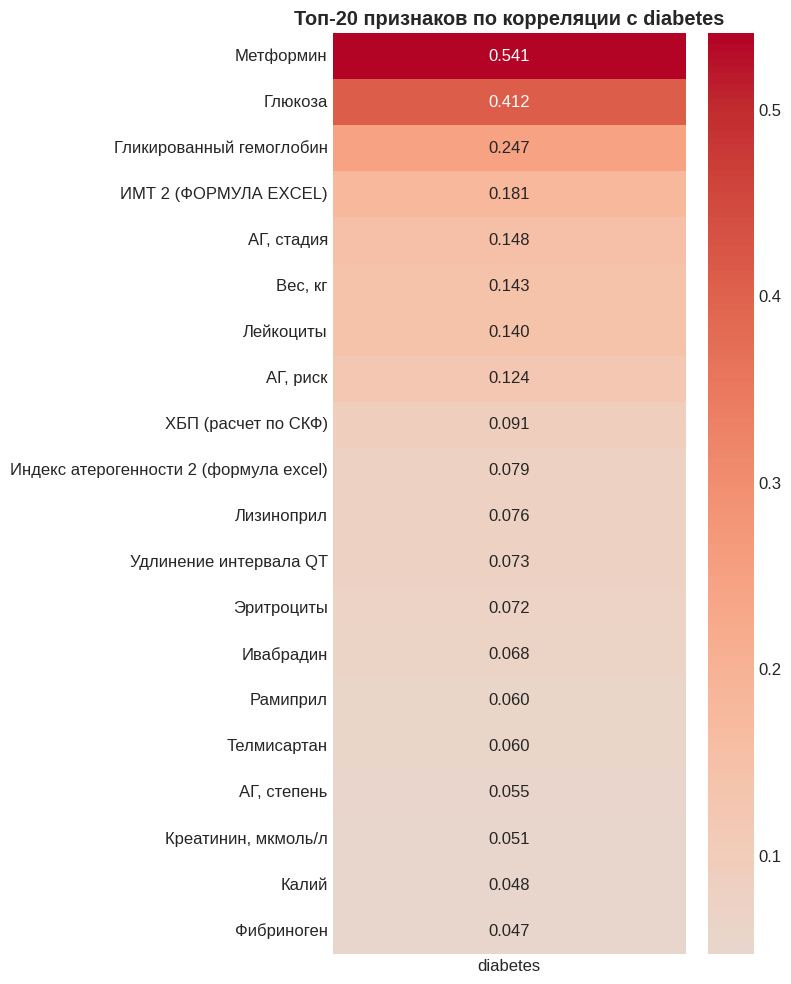

In [47]:
df = pd.concat([X, y], axis=1)

correlation_with_target = df.corr()[['diabetes']].sort_values('diabetes', ascending=False)

# Берем топ-20 (исключая сам diabetes)
top_20 = correlation_with_target.drop('diabetes').head(20)

# Визуализируем
plt.figure(figsize=(8, 10))
sns.heatmap(top_20, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Топ-20 признаков по корреляции с diabetes', fontweight='bold')
plt.tight_layout()
plt.show()

Топ 3 самых коррелируемых признаков- Метформин(541), Глюкоза(412) и Гликированный гемоглабин(247)

In [48]:
def get_models():
  models = list()
  models.append(('Logistic Regression', LogisticRegression()))
  models.append(('Random Forest', RandomForestClassifier()))
  models.append(('Decision Tree', DecisionTreeClassifier()))
  models.append(('XGBoost', XGBClassifier()))
  return models

In [49]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Используем neg_root_mean_squared_error и затем берем абсолютное значение
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return np.abs(scores)  # Преобразуем отрицательные значения в положительные RMSE

# Получаем модели
models = get_models()

In [50]:
results = []
names = []
print('Результат (RMSE):\n')

for name, model in models:
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s: %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Результат (RMSE):

>Logistic Regression: 0.618 (0.069)
>Random Forest: 0.394 (0.063)
>Decision Tree: 0.442 (0.056)
>XGBoost: 0.391 (0.057)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
    # Базовые модели
    level0 = list()
    level0.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
    level0.append(('Random Forest', RandomForestClassifier(random_state=42)))
    level0.append(('KNeighbors', KNeighborsClassifier()))
    level0.append(('XGBoost', XGBClassifier(eval_metric='logloss', random_state=42)))
    # Мета модель
    level1 = LogisticRegression(max_iter=1000)
    # Определяем ансамбль стекинга
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Предопределяем модели, заносим еще модель Стекинга
def get_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression(max_iter=1000, random_state=42)
    models['Random Forest'] = RandomForestClassifier(random_state=42)
    models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
    models['KNeighbors'] = KNeighborsClassifier()
    models['XGBoost'] = XGBClassifier(eval_metric='logloss', random_state=42)
    models['Stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y, metric='accuracy'):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    if metric == 'accuracy':
        scoring = 'accuracy'
    elif metric == 'precision':
        scoring = 'precision_weighted'
    elif metric == 'recall':
        scoring = 'recall_weighted'
    elif metric == 'f1':
        scoring = 'f1_weighted'
    elif metric == 'f1_macro':
        scoring = 'f1_macro'
    else:
        scoring = 'accuracy'

    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

> Logistic Regression : Среднее Accuracy = 0.742 (±0.052)
> Random Forest       : Среднее Accuracy = 0.838 (±0.044)
> Decision Tree       : Среднее Accuracy = 0.796 (±0.061)
> KNeighbors          : Среднее Accuracy = 0.530 (±0.070)
> XGBoost             : Среднее Accuracy = 0.844 (±0.045)
> Stacking            : Среднее Accuracy = 0.841 (±0.045)
> Logistic Regression : Среднее F1-weighted = 0.742 (±0.052)
> Random Forest       : Среднее F1-weighted = 0.838 (±0.044)
> Decision Tree       : Среднее F1-weighted = 0.795 (±0.062)
> KNeighbors          : Среднее F1-weighted = 0.529 (±0.069)
> XGBoost             : Среднее F1-weighted = 0.843 (±0.045)
> Stacking            : Среднее F1-weighted = 0.841 (±0.045)
> Logistic Regression : Среднее F1-macro = 0.740 (±0.052)
> Random Forest       : Среднее F1-macro = 0.836 (±0.044)
> Decision Tree       : Среднее F1-macro = 0.791 (±0.063)
> KNeighbors          : Среднее F1-macro = 0.524 (±0.071)
> XGBoost             : Среднее F1-macro = 0.842 (±0.0

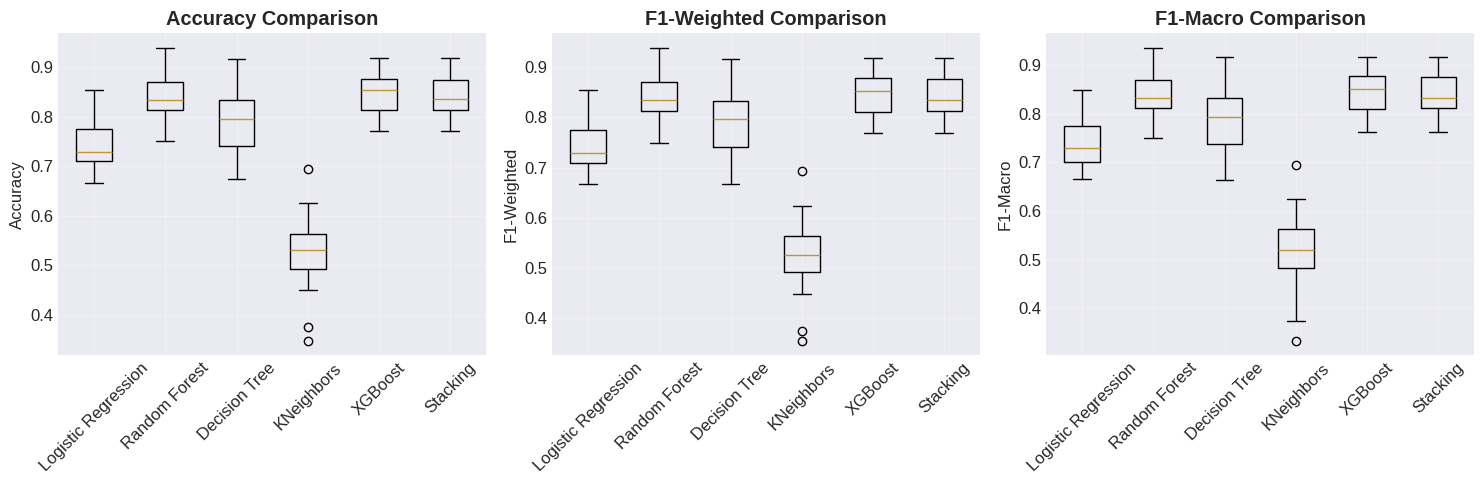

Logistic Regression  0.742±0.052  0.742±0.052  0.740±0.052
Random Forest        0.838±0.044  0.838±0.044  0.836±0.044
Decision Tree        0.796±0.061  0.795±0.062  0.791±0.063
KNeighbors           0.530±0.070  0.529±0.069  0.524±0.071
XGBoost              0.844±0.045  0.843±0.045  0.842±0.045
Stacking             0.841±0.045  0.841±0.045  0.840±0.045


In [53]:
results_acc = []
names_acc = []

for name, model in models.items():
    scores = evaluate_model(model, X, y, metric='accuracy')
    results_acc.append(scores)
    names_acc.append(name)
    print(f"> {name:20}: Среднее Accuracy = {np.mean(scores):.3f} (±{np.std(scores):.3f})")

results_f1_weighted = []
names_f1_weighted = []

for name, model in models.items():
    scores = evaluate_model(model, X, y, metric='f1')
    results_f1_weighted.append(scores)
    names_f1_weighted.append(name)
    print(f"> {name:20}: Среднее F1-weighted = {np.mean(scores):.3f} (±{np.std(scores):.3f})")

print("="*70)
results_f1_macro = []
names_f1_macro = []

for name, model in models.items():
    scores = evaluate_model(model, X, y, metric='f1_macro')  # ИСПОЛЬЗУЕМ НОВУЮ МЕТРИКУ
    results_f1_macro.append(scores)
    names_f1_macro.append(name)
    print(f"> {name:20}: Среднее F1-macro = {np.mean(scores):.3f} (±{np.std(scores):.3f})")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(results_acc, labels=names_acc)
plt.title('Accuracy Comparison', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(results_f1_weighted, labels=names_f1_weighted)
plt.title('F1-Weighted Comparison', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('F1-Weighted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.boxplot(results_f1_macro, labels=names_f1_macro)
plt.title('F1-Macro Comparison', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('F1-Macro')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for i, name in enumerate(names_acc):
    acc_mean = np.mean(results_acc[i])
    acc_std = np.std(results_acc[i])
    f1w_mean = np.mean(results_f1_weighted[i])
    f1w_std = np.std(results_f1_weighted[i])
    f1m_mean = np.mean(results_f1_macro[i])
    f1m_std = np.std(results_f1_macro[i])

    print(f"{name:20} {acc_mean:.3f}±{acc_std:.3f}  {f1w_mean:.3f}±{f1w_std:.3f}  {f1m_mean:.3f}±{f1m_std:.3f}")

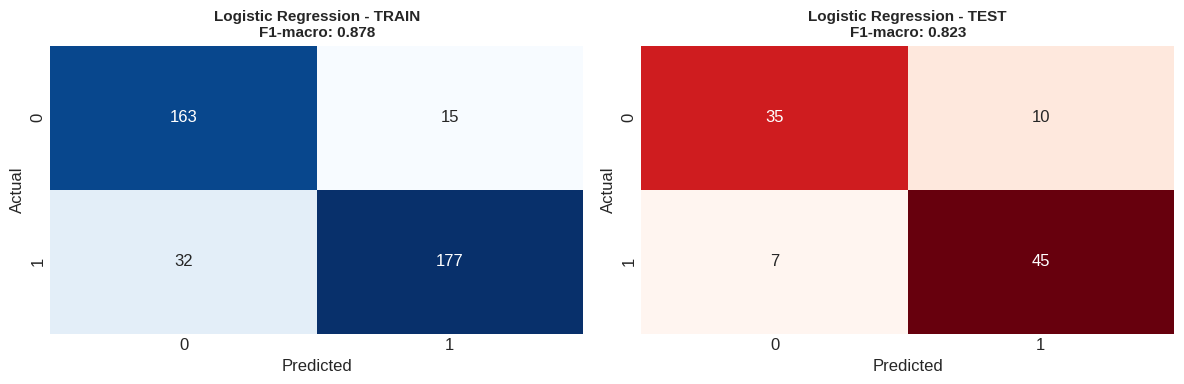

TRAIN Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       178
           1       0.92      0.85      0.88       209

    accuracy                           0.88       387
   macro avg       0.88      0.88      0.88       387
weighted avg       0.88      0.88      0.88       387


TEST Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        45
           1       0.82      0.87      0.84        52

    accuracy                           0.82        97
   macro avg       0.83      0.82      0.82        97
weighted avg       0.83      0.82      0.82        97



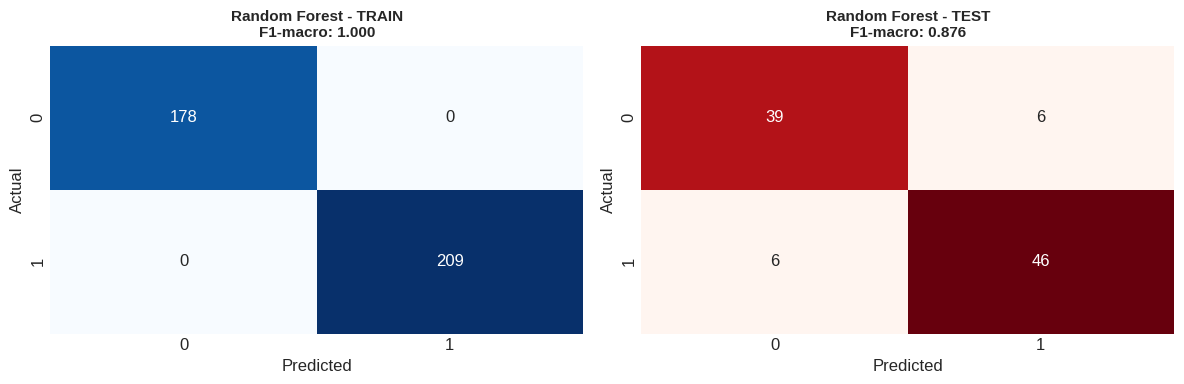

TRAIN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       209

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387


TEST Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.88      0.88      0.88        52

    accuracy                           0.88        97
   macro avg       0.88      0.88      0.88        97
weighted avg       0.88      0.88      0.88        97



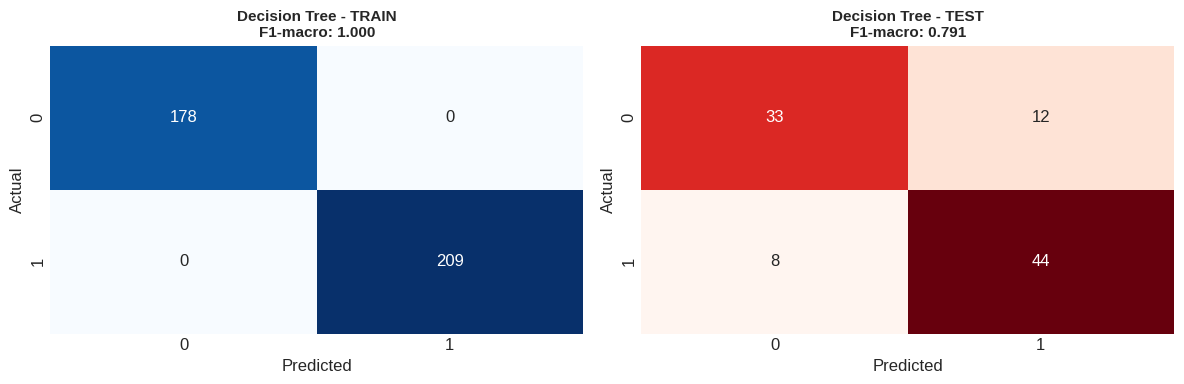

TRAIN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       209

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387


TEST Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        45
           1       0.79      0.85      0.81        52

    accuracy                           0.79        97
   macro avg       0.80      0.79      0.79        97
weighted avg       0.79      0.79      0.79        97



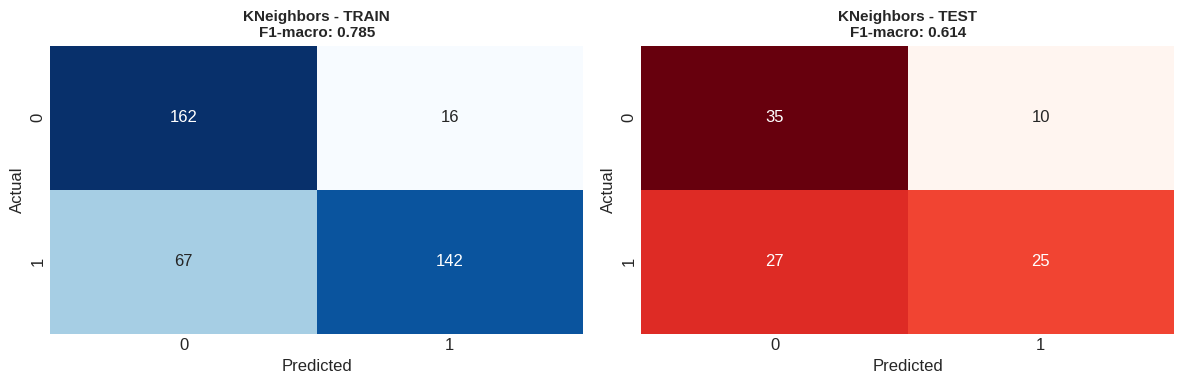

TRAIN Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       178
           1       0.90      0.68      0.77       209

    accuracy                           0.79       387
   macro avg       0.80      0.79      0.78       387
weighted avg       0.81      0.79      0.78       387


TEST Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        45
           1       0.71      0.48      0.57        52

    accuracy                           0.62        97
   macro avg       0.64      0.63      0.61        97
weighted avg       0.64      0.62      0.61        97



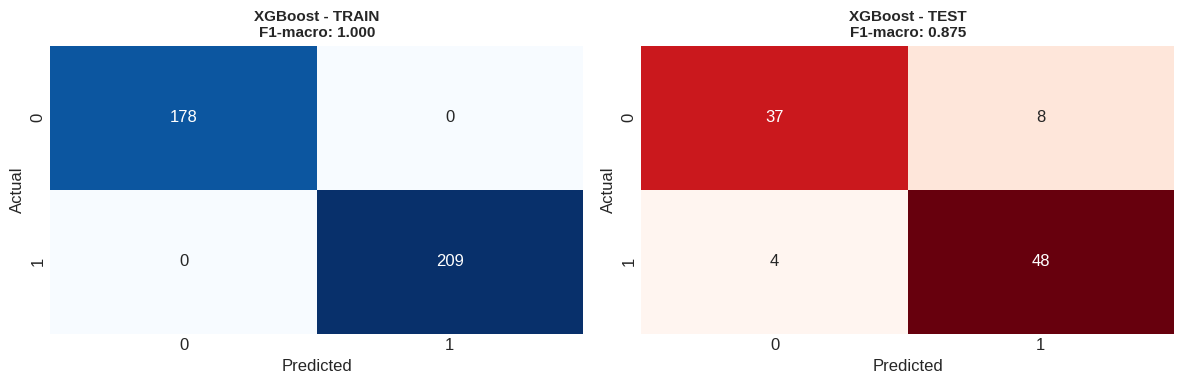

TRAIN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       209

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387


TEST Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        45
           1       0.86      0.92      0.89        52

    accuracy                           0.88        97
   macro avg       0.88      0.87      0.87        97
weighted avg       0.88      0.88      0.88        97



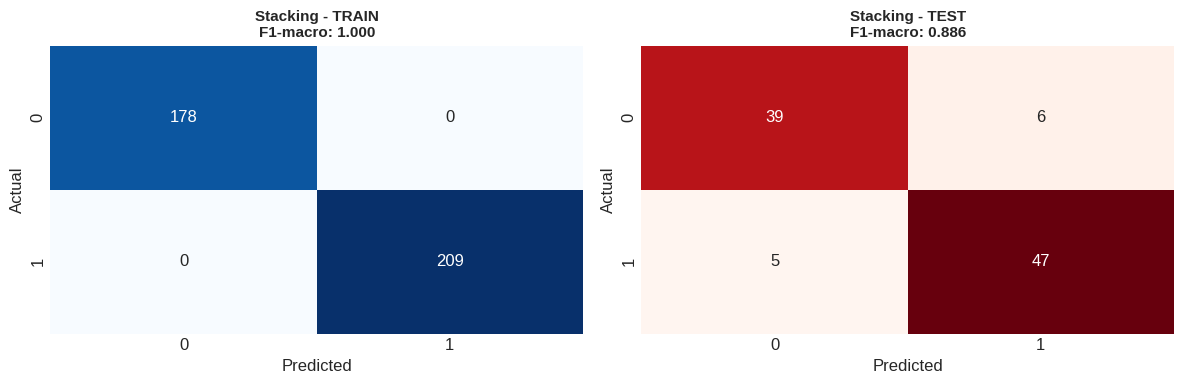

TRAIN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       209

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387


TEST Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.90      0.90        52

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97

              Model  Train_Acc  Train_F1w  Train_F1m  Test_Acc  Test_F1w  Test_F1m
Logistic Regression      0.879      0.879      0.878     0.825     0.824     0.823
      Random Forest      1.000      1.000      1.000     0.876     0.876     0.876
      Decision Tree      1.000      1.000      1.000     0.794     0.

In [54]:
models = get_models()
labels = ['0', '1']

results_summary = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Метрики
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1w = f1_score(y_train, y_train_pred, average='weighted')
    train_f1m = f1_score(y_train, y_train_pred, average='macro')

    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1w = f1_score(y_test, y_test_pred, average='weighted')
    test_f1m = f1_score(y_test, y_test_pred, average='macro')

    results_summary.append({
        'Model': name,
        'Train_Acc': train_acc,
        'Train_F1w': train_f1w,
        'Train_F1m': train_f1m,
        'Test_Acc': test_acc,
        'Test_F1w': test_f1w,
        'Test_F1m': test_f1m
    })

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Train confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=labels, yticklabels=labels, cbar=False)
    axes[0].set_title(f'{name} - TRAIN\nF1-macro: {train_f1m:.3f}', fontsize=11, fontweight='bold')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Test confusion matrix
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', ax=axes[1],
                xticklabels=labels, yticklabels=labels, cbar=False)
    axes[1].set_title(f'{name} - TEST\nF1-macro: {test_f1m:.3f}', fontsize=11, fontweight='bold')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    print(f"TRAIN Report:\n{classification_report(y_train, y_train_pred, target_names=labels, zero_division=0)}")
    print(f"\nTEST Report:\n{classification_report(y_test, y_test_pred, target_names=labels, zero_division=0)}")

results_df = pd.DataFrame(results_summary)
print(results_df.round(3).to_string(index=False))

#Stacking (Лучшая модель)- небольшое переобучение

Train: Acc=1.000, F1=1.000    

Test:  Acc=0.887, F1=0.886

Разница: 11.3%

Класс 0: 39 верно / 6 ошибок

Класс 1: 47 верно / 5 ошибок

#2 место Random Forest & XGBoost- идеальное обучение (1.000) указывает на переобучение

#3 место Logistic Regression- самая стабильная модель, но уступает в качестве

#4 место Decision Tree- Сильное переобучение, слишком простая модель для этой задачи

#5 место- KNeighbors- низкое качество и переобучение, не подходит для этих данных